In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping


In [27]:
train_images = pd.read_csv('data/csvTrainImages 13440x1024.csv')
train_label = pd.read_csv('data/csvTrainLabel 13440x1.csv')

test_images = pd.read_csv('data/csvTestImages 3360x1024.csv')
test_label = pd.read_csv('data/csvTestLabel 3360x1.csv')

In [29]:
train_label = train_label -1
test_label = test_label -1

In [32]:
train_images.shape, train_label.shape

((13439, 1024), (13439, 1))

In [31]:
X_train = train_images.to_numpy().reshape(-1, 32, 32)
y_train = train_label.to_numpy()

X_test = test_images.to_numpy().reshape(-1, 32, 32)
y_test = test_label.to_numpy()

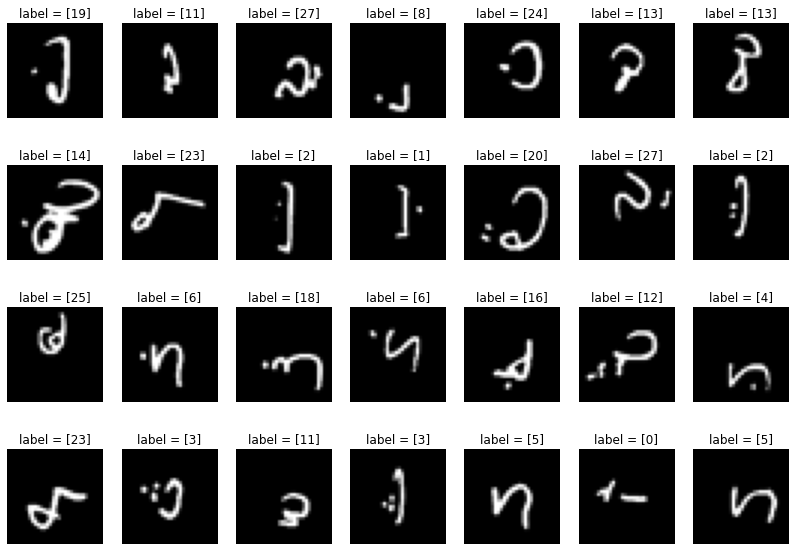

In [33]:
fig, ax = plt.subplots(4, 7, figsize=(14, 10))

for row in range(4):
    for col in range(7):
        i  = np.random.randint(0,X_train.shape[0])
        plt.sca(ax[row, col])
        plt.title(f'label = {y_train[i]}')
#         img = plt.imread(TRAIN_DIRECTORY+train_df.iloc[img_index[i]]["id_ext"])
        plt.imshow(X_train[i],cmap='gray')
        plt.axis('off')
#         i+=1

In [10]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

In [11]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ]
    )
    
    return block

In [38]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(32,32,1)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(128),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(512),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(128, 0.5),
        tf.keras.layers.Dropout(0.4),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(28, activation='softmax')
    ])
    
    return model

In [39]:
model = build_model()
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 16)        160       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 sequential_18 (Sequential)  (None, 8, 8, 128)         166656    
                                                                 
 sequential_19 (Sequential)  (None, 4, 4, 256)         886272    
                                                                 
 dropout_15 (Dropout)        (None, 4, 4, 256)         0         
                                                     

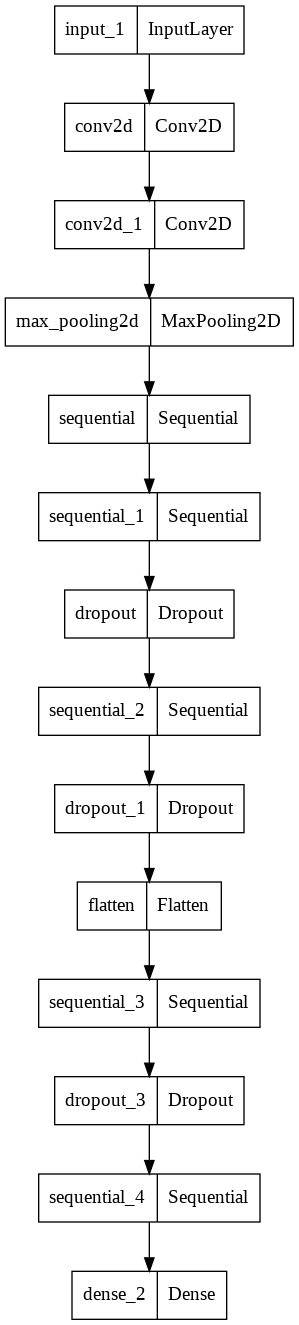

In [23]:
tf.keras.utils.plot_model(
    model
)

In [41]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
callback = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True,
)

In [34]:
history = model.fit(X_train, y_train, batch_size=256, epochs=50,
                 validation_data=(X_test, y_test), shuffle=True,
                                        # callbacks=[callback]

                )

Epoch 1/50
53/53 [==============================] - 18s 98ms/step - loss: 3.5225 - accuracy: 0.0987 - val_loss: 3.4088 - val_accuracy: 0.0765
Epoch 2/50
53/53 [==============================] - 3s 50ms/step - loss: 2.8316 - accuracy: 0.1954 - val_loss: 2.6852 - val_accuracy: 0.2528
Epoch 3/50
53/53 [==============================] - 3s 50ms/step - loss: 2.4345 - accuracy: 0.2765 - val_loss: 2.3856 - val_accuracy: 0.4129
Epoch 4/50
53/53 [==============================] - 3s 47ms/step - loss: 2.1524 - accuracy: 0.3494 - val_loss: 2.1621 - val_accuracy: 0.5001
Epoch 5/50
53/53 [==============================] - 3s 47ms/step - loss: 1.9620 - accuracy: 0.4029 - val_loss: 2.0447 - val_accuracy: 0.4984
Epoch 6/50
53/53 [==============================] - 3s 47ms/step - loss: 1.7726 - accuracy: 0.4596 - val_loss: 1.7057 - val_accuracy: 0.5880
Epoch 7/50
53/53 [==============================] - 3s 48ms/step - loss: 1.6382 - accuracy: 0.5006 - val_loss: 1.6612 - val_accuracy: 0.5609
Epoch 8/50
5

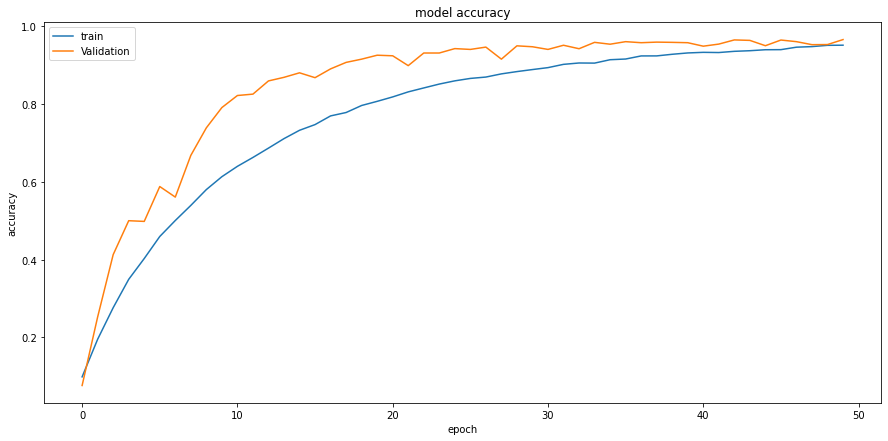

In [35]:
plt.figure(figsize=(15,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()


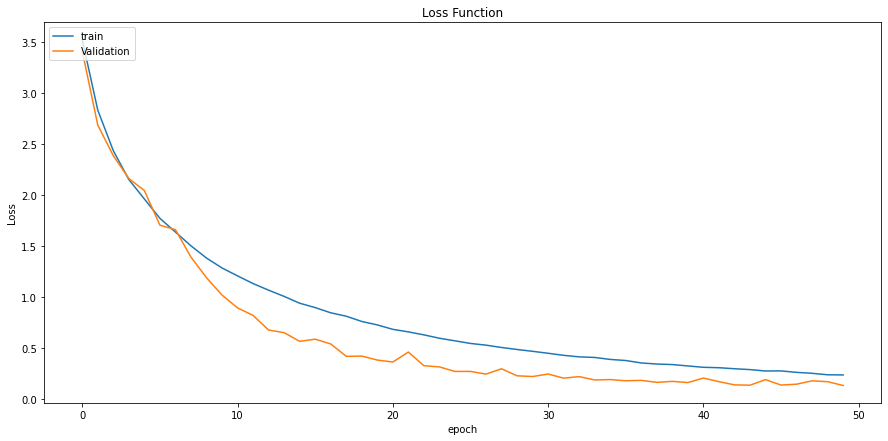

In [36]:
plt.figure(figsize=(15,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Function')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()
